# 1.Introduction


The dataset contains 27481 rows containing tweet ID, tweets (the text) and the
sentiment(positive, negative, neutral). for each row

Eact tweet is falls under one of three categories ( positive, negative ,
neutral)

source: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data


Goal: The goal is to track twitter sentiments over time


Imports


In [1]:
# try:
import seaborn as sns

import pandas as pd
import numpy as np
import spacy
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from PIL import Image

# except:
#     # import seaborn as sns
#     ! pip install pandas
#     ! pip install numpy
#     ! conda install collections
#     ! pip install plotly
#     ! pip install matplotlib
#     ! pip install scikit-learn
#     ! pip install spacy
#     ! install pillow
#     ! pip install wordcloud
#     ! pip install seaborn

## Loading Dataset


In [2]:
path = "./tweets.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


The original data already has selected_text column that is cleaned. Since i
intend to do the preprocessing myself, i will drop the selected text portion of
the dataset

every text has a text ID and a sentiment label


In [4]:
df.drop("selected_text", axis=1, inplace=True)
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


the data has 27481 tweets, and each text has a text ID and a sentiment tag


checking for null values, i notice text on row 314 has "NaN" in the text field
which is not acceptable. i will have to remove this row


In [6]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,textID,text,sentiment
314,fdb77c3752,NaN,neutral


Removing nulls


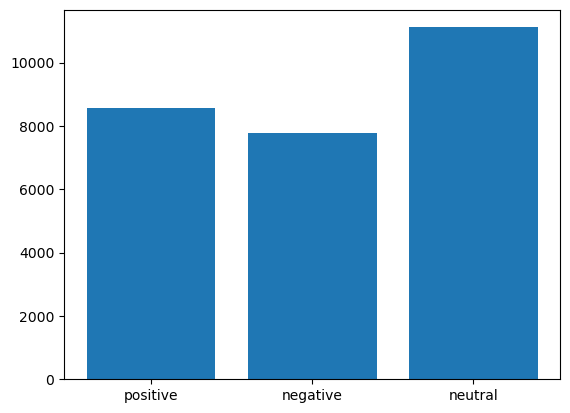

In [7]:
# removing null row
df.dropna(inplace=True)
df.isnull().sum()  # checking again if there are any nulls


neutral_count = 0
positive_count = 0
negative_count = 0

header = ["positive", "negative", "neutral"]


for sentiment in df["sentiment"]:
    if sentiment == "neutral":
        neutral_count += 1
    elif sentiment == "positive":
        positive_count += 1

    elif sentiment == "negative":
        negative_count += 1

sentiment_array = [
    positive_count,
    negative_count,
    neutral_count,
]


data = {
    header[0]: sentiment_array[0],
    header[1]: sentiment_array[1],
    header[2]: sentiment_array[2],
}
names = list(data.keys())
values = list(data.values())

fig = plt.bar(names, values)

There is a total of 11117 neutral tweets, 8582 positive tweets and 7781 negative
tweets


In [8]:
df["sentiment"].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

Since the dataset is large, i will only use a subset of the dataset


In [9]:
# since the dataset is massive, i will only take a subset of each sentiment

selected_rows1 = df[df["sentiment"] == "positive"].head(2500)
selected_rows2 = df[df["sentiment"] == "negative"].head(2500)
selected_rows3 = df[df["sentiment"] == "neutral"].head(2500)

now that we have equal number of postive, negative and neutral sentiment tweets,
i combind them into a new dataframe


In [10]:
new_df = pd.concat([selected_rows1, selected_rows2, selected_rows3])
print("new dataframs shape: ", new_df.shape)
new_df.tail()

new dataframs shape:  (7500, 3)


,textID,text,sentiment
6145,602d75fc3c,no its pre made jelly and its for me and bradie,neutral
6147,d073fa9b62,I kind of miss a certain someone already. and...,neutral
6148,195157e55e,is needing to make a new video,neutral
6149,d5fdf430d2,"Hey Peter, thanks for the follow. So many Syd...",neutral
6156,f178273088,Is trying to buy a new bible...but they just a...,neutral


Cleaning text


In [11]:
nlp = spacy.load("en_core_web_lg")

approaches

1. Remove digits
2. Remove stop words
3. Remove punctuations
4. Remove emails and urls
5. lemmatized the words


In [12]:
# reducing text to lower case


def preprocess(text):
    doc = nlp(text)
    # cleaned_text = [
    #     token.text.lower()
    #     for token in doc
    #     if not token.text.isdigit() or not token.is_stop or not token.is_punct
    # ]

    cleaned_text = [
        # performing lemmatization and removing punctuations, stop words, emails and urls from the text
        token.lemma_
        for token in doc
        if not (
            token.is_digit
            or token.is_punct
            or token.is_stop
            or token.like_email
            or token.like_url
        )
    ]

    return " ".join(cleaned_text)  # returns the cleaned text

In [13]:
#  new_df['Preprocessed_text'] = new_df['text'].apply(lambda x: preprocess(x))
new_df.insert(2, "cleaned_text", new_df["text"].apply(lambda x: preprocess(x)))
print(new_df.shape)
new_df.tail()

(7500, 4)


,textID,text,cleaned_text,sentiment
6145,602d75fc3c,no its pre made jelly and its for me and bradie,pre jelly bradie,neutral
6147,d073fa9b62,I kind of miss a certain someone already. and...,kind miss certain,neutral
6148,195157e55e,is needing to make a new video,need new video,neutral
6149,d5fdf430d2,"Hey Peter, thanks for the follow. So many Syd...",hey Peter thank follow Sydney pastor tweet S...,neutral
6156,f178273088,Is trying to buy a new bible...but they just a...,try buy new bible aren`t dog chew,neutral


visualizing the common words of the processed segment of data


In [14]:
new_df["temp_list"] = new_df["cleaned_text"].apply(lambda x: str(x).split())
top = Counter([item for sublist in new_df["temp_list"] for item in sublist])

new_df.drop("temp_list", axis=1, inplace=True)
common = pd.DataFrame(top.most_common(20))
common.columns = ["common_words", "count"]
common.style.background_gradient(cmap="Blues")

,common_words,count
0,i`m,614
1,go,560
2,day,553
3,good,513
4,get,442
5,work,411
6,like,400
7,love,350
8,not,329
9,it`s,297


Graph of the common words in cleaned subset


In [15]:
fig = px.bar(
    common,
    x="count",
    y="common_words",
    title="Top 20 common words in Cleaned Tweet",
    orientation="h",
    width=700,
    height=700,
    color="common_words",
)
fig.show()

common words in original tweet


In [16]:
new_df["temp"] = new_df["text"].apply(
    lambda x: str(x).split()
)  # list of words in every row

top = Counter([item for sublist in new_df["temp"] for item in sublist])
new_df.drop("temp", axis=1, inplace=True)
common1 = pd.DataFrame(top.most_common(20))
common1.columns = ["common_words", "count"]
common1.style.background_gradient(cmap="Blues")

,common_words,count
0,to,2784
1,the,2330
2,I,2329
3,a,1695
4,my,1386
5,and,1369
6,i,1165
7,you,1051
8,is,1049
9,for,990


Graph of common words in original subset


In [17]:
fig = px.bar(
    common1,
    x="count",
    y="common_words",
    title="Top 20 common Words in Original Tweet",
    orientation="h",
    width=700,
    height=700,
    color="common_words",
)
fig.show()

In [18]:
positive = new_df[new_df["sentiment"] == "positive"]
negative = new_df[new_df["sentiment"] == "negative"]
neutral = new_df[new_df["sentiment"] == "neutral"]

Word cloud for positive tweets in cleaned subset


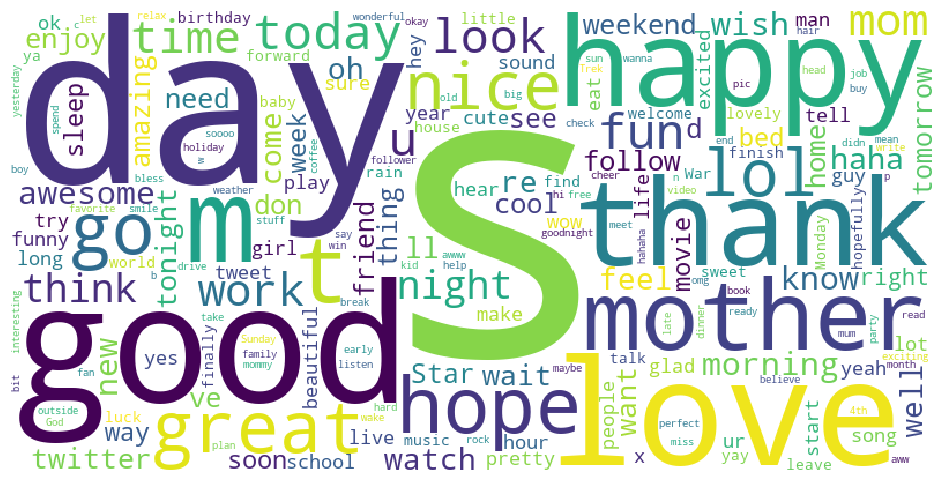

In [19]:
# pos_mask = np.array(Image.open("./twitter.png"))


wordcloud_positive = WordCloud(
    width=800,
    height=400,
    # max_font_size=200,
    background_color="white",
    collocations=False,
).generate(" ".join(tweet for tweet in positive["cleaned_text"]))


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation="None")
plt.axis("off")  # Remove axes
plt.show()

word cloud for negative tweets in cleaned subset


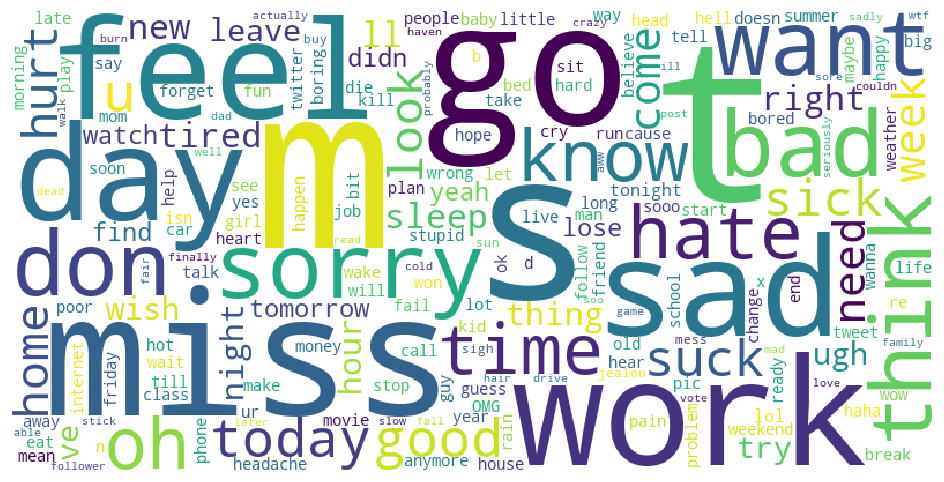

In [20]:
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    max_font_size=200,
    background_color="white",
    collocations=False,
    # mask=np.array(Image.open("./twitter.png")),
).generate(" ".join(tweet for tweet in negative["cleaned_text"]))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation="None")
plt.axis("off")  # Remove axes
plt.show()

word cloud for nuetral tweets in cleaned subset


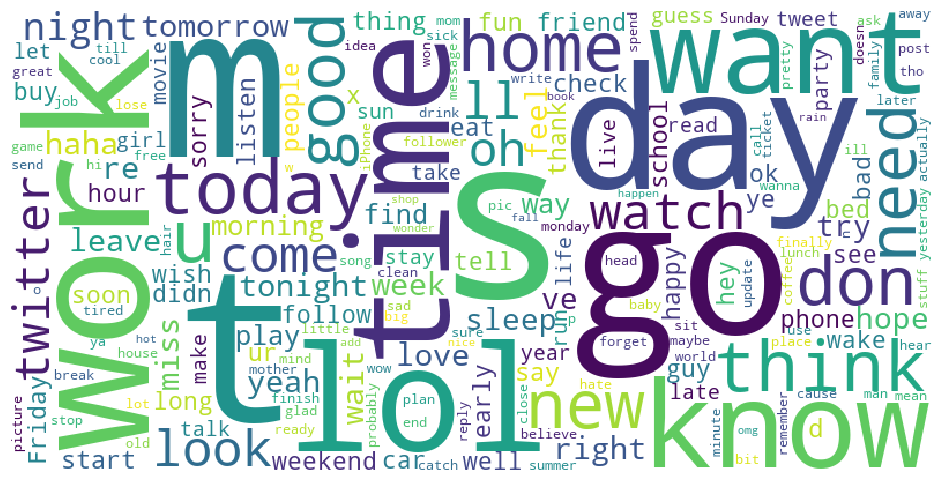

In [21]:
wordcloud_neutral = WordCloud(
    width=800,
    height=400,
    background_color="white",
    collocations=False,
    max_font_size=200,
    # title_size=30,
    # title="WordCloud of Neutral Tweets",
    # mask=np.array(Image.open("./twitter.png")),
).generate(" ".join(tweet for tweet in neutral["cleaned_text"]))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neutral, interpolation="None")
plt.axis("off")  # Remove axes
plt.show()

# Word Embedding


### I will attempt Word embedding on the first 3 texts in the datasets. this is because doing it on the whole dataset might not reveal anything significant


## One-Hot encoding on the first 3 original texts


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample text data
original_documents = new_df["text"][0:3].values

# Initialize CountVectorizer with binary=True for one-hot encoding
vectorizer = CountVectorizer(binary=True)

# Fit and transform the documents
X = vectorizer.fit_transform(original_documents)

# Convert to array
one_hot_vectors = X.toarray()

# displaying the text
for i in range(3):
    print(f"text {i+1}: {original_documents[i]} \n")

print("\none-hot encoding")
# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the one-hot encoded vectors
print("One-Hot Encoded Vectors:\n", one_hot_vectors)

text 1: 2am feedings for the baby are fun when he is all smiles and coos 

text 2:  Journey!? Wow... u just became cooler.  hehe... (is that possible!?) 

text 3: I really really like the song Love Story by Taylor Swift 


one-hot encoding
Feature names: ['2am' 'all' 'and' 'are' 'baby' 'became' 'by' 'cooler' 'coos' 'feedings'
 'for' 'fun' 'he' 'hehe' 'is' 'journey' 'just' 'like' 'love' 'possible'
 'really' 'smiles' 'song' 'story' 'swift' 'taylor' 'that' 'the' 'when'
 'wow']
One-Hot Encoded Vectors:
 [[1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0]]


## One-hot Encoding on the first 3 cleaned text


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample text data
cleaned_documents = new_df["cleaned_text"][0:3].values

# Initialize CountVectorizer with binary=True for one-hot encoding
vectorizer = CountVectorizer(binary=True)

# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array
one_hot_vectors = X.toarray()

# displaying the text
for i in range(3):
    print(f"text {i+1}: {cleaned_documents[i]} \n")

print("\none-hot encoding")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the one-hot encoded vectors
print("One-Hot Encoded Vectors:\n", one_hot_vectors)

text 1: feeding baby fun smile coo 

text 2:   Journey wow u cool   hehe possible 

text 3: like song Love Story Taylor Swift 


one-hot encoding
Feature names: ['baby' 'coo' 'cool' 'feeding' 'fun' 'hehe' 'journey' 'like' 'love'
 'possible' 'smile' 'song' 'story' 'swift' 'taylor' 'wow']
One-Hot Encoded Vectors:
 [[1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0]]


## Bag of Words for first 3 original text

Notice in the third sentence, the word "really" appears two times in the
sentence so the count is 2


In [24]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(original_documents)

# Convert to array and show the result
count_vector = X.toarray()

# Displaying the sentences
for i in range(3):
    print(f"text {i+1}: {original_documents[i]} \n")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the count vectors
print("\nCount Vectors:\n", count_vector)

text 1: 2am feedings for the baby are fun when he is all smiles and coos 

text 2:  Journey!? Wow... u just became cooler.  hehe... (is that possible!?) 

text 3: I really really like the song Love Story by Taylor Swift 

Feature names: ['2am' 'all' 'and' 'are' 'baby' 'became' 'by' 'cooler' 'coos' 'feedings'
 'for' 'fun' 'he' 'hehe' 'is' 'journey' 'just' 'like' 'love' 'possible'
 'really' 'smiles' 'song' 'story' 'swift' 'taylor' 'that' 'the' 'when'
 'wow']

Count Vectors:
 [[1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 1 1 1 1 0 1 0 0]]


## Bag of words for first 3 cleaned text


In [25]:
# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array and show the result
count_vector = X.toarray()

for i in range(3):
    print(f"text {i+1}: {cleaned_documents[i]} \n")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the count vectors
print("\nCount Vectors:\n", count_vector)

text 1: feeding baby fun smile coo 

text 2:   Journey wow u cool   hehe possible 

text 3: like song Love Story Taylor Swift 

Feature names: ['baby' 'coo' 'cool' 'feeding' 'fun' 'hehe' 'journey' 'like' 'love'
 'possible' 'smile' 'song' 'story' 'swift' 'taylor' 'wow']

Count Vectors:
 [[1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0]]


## TF-IDF for first 3 Original text


In [26]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(original_documents)

# Convert to array and show the result
tfidf_vector = X.toarray()

for i in range(3):
    print(f"text {i+1}: {original_documents[i]} \n")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the TF-IDF vectors
print("\nTF-IDF Vectors:\n", tfidf_vector)

text 1: 2am feedings for the baby are fun when he is all smiles and coos 

text 2:  Journey!? Wow... u just became cooler.  hehe... (is that possible!?) 

text 3: I really really like the song Love Story by Taylor Swift 

Feature names: ['2am' 'all' 'and' 'are' 'baby' 'became' 'by' 'cooler' 'coos' 'feedings'
 'for' 'fun' 'he' 'hehe' 'is' 'journey' 'just' 'like' 'love' 'possible'
 'really' 'smiles' 'song' 'story' 'swift' 'taylor' 'that' 'the' 'when'
 'wow']

TF-IDF Vectors:
 [[0.27569246 0.27569246 0.27569246 0.27569246 0.27569246 0.
  0.         0.         0.27569246 0.27569246 0.27569246 0.27569246
  0.27569246 0.         0.20967122 0.         0.         0.
  0.         0.         0.         0.27569246 0.         0.
  0.         0.         0.         0.20967122 0.27569246 0.        ]
 [0.         0.         0.         0.         0.         0.34142622
  0.         0.34142622 0.         0.         0.         0.
  0.         0.34142622 0.25966344 0.34142622 0.34142622 0.
  0.         0.3

## TF-IDF for first 3 cleaned text


In [27]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array and show the result
tfidf_vector = X.toarray()

for i in range(3):
    print(f"text {i+1}: {cleaned_documents[i]} \n")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the TF-IDF vectors
print("\nTF-IDF Vectors:\n", tfidf_vector)

text 1: feeding baby fun smile coo 

text 2:   Journey wow u cool   hehe possible 

text 3: like song Love Story Taylor Swift 

Feature names: ['baby' 'coo' 'cool' 'feeding' 'fun' 'hehe' 'journey' 'like' 'love'
 'possible' 'smile' 'song' 'story' 'swift' 'taylor' 'wow']

TF-IDF Vectors:
 [[0.4472136  0.4472136  0.         0.4472136  0.4472136  0.
  0.         0.         0.         0.         0.4472136  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.4472136  0.         0.         0.4472136
  0.4472136  0.         0.         0.4472136  0.         0.
  0.         0.         0.         0.4472136 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.40824829 0.40824829 0.         0.         0.40824829
  0.40824829 0.40824829 0.40824829 0.        ]]


## Performing spacy vectorization for the first 3 sentences in the original text


In [28]:
for word in original_documents:
    doc = nlp(word)
    print(doc.vector)

[-0.8745441  -0.81955886 -1.3452809  -0.1094586   1.6035613   1.4287633
 -1.200539    4.461926   -1.7799679   0.24934554  5.8595366  -0.33298466
 -1.2678592   0.252532    3.7596269   1.3617027   0.2695193  -2.15873
 -2.076234   -1.9053677   0.75446534  0.71059996 -2.7602632  -2.6469142
 -2.455952    0.461672   -2.354135    0.16496727 -0.5450445   0.8522093
  1.5425867  -0.02462474 -1.9413383  -2.4139934  -1.1843019   0.65101874
  0.89801824  2.4459763   2.874106    1.3953667   0.9179026   2.1682854
  0.43068993 -0.7372138  -1.2145973   2.8056283   1.507642   -3.7844496
 -0.18080483  2.0468934   1.7641037   1.1903934   0.8210974  -4.4303775
 -0.4799054   1.0694062  -0.10250135  1.5785886   0.16281405  0.60159075
  1.6570287   0.24636431 -0.02431397 -1.4448954   1.2113999   0.728438
 -2.9963608  -2.1659327   2.0420847   1.382726   -0.881061    1.9492188
  0.17552729 -0.23354334 -0.09688333 -0.13099977 -2.815867    0.85380137
 -2.1387827   0.54322803 -2.7160628  -0.7349971   0.08816747 -1

## Performing spacy vectorization for the first 3 sentences in the cleaned text


In [29]:
for word in cleaned_documents:
    doc = nlp(word)
    print(doc.vector)

[ 1.41703606e+00  1.86462212e+00 -3.86430025e+00 -2.15859199e+00
 -1.15264797e+00  3.50899994e-01  1.01472402e+00 -2.08281994e-01
 -2.05322003e+00  2.48059011e+00  2.08682013e+00 -1.59601998e+00
  2.23800428e-02  2.26190400e+00  4.67098999e+00 -1.15792644e+00
  5.86309314e-01 -2.54340410e+00 -1.75688589e+00 -6.18055940e-01
 -5.62307954e-01  4.06534767e+00 -1.41711950e+00 -3.49608374e+00
 -6.64084017e-01 -5.45555949e-01 -1.58561194e+00  2.22920132e+00
  7.33025968e-01  2.33523989e+00  6.83787942e-01 -1.23647809e+00
  1.22779989e+00 -1.21465802e+00  3.08858204e+00 -9.58696008e-01
  2.38950610e+00  2.43813947e-01  1.27044594e+00 -1.42782199e+00
  1.14082003e+00  6.43823981e-01  2.80396795e+00 -1.96193385e+00
 -4.35610056e-01  2.13931990e+00  2.79594004e-01 -1.24237800e+00
  2.54332215e-01  6.69153988e-01  2.39583778e+00 -3.71433884e-01
 -1.10735202e+00 -2.17511201e+00  9.67599824e-02  1.36201215e+00
  4.92039979e-01  1.06314003e+00  2.23636413e+00  1.06358898e+00
  9.30932045e-01 -5.33119

## One-hot encoding of the cleaned text


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample text data
cleaned_documents = new_df["cleaned_text"].values

# Initialize CountVectorizer with binary=True for one-hot encoding
vectorizer = CountVectorizer(binary=True)

# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array
one_hot_vectors = X.toarray()

print("\none-hot encoding")

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the one-hot encoded vectors
print("One-Hot Encoded Vectors:\n", one_hot_vectors)

print(one_hot_vectors.shape)


one-hot encoding
Feature names: ['00' '000' '05' ... '½ve' '½you' '½ï']
One-Hot Encoded Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(7500, 9620)


## Bag of words of the cleaned text


In [31]:
# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array and show the result
count_vector = X.toarray()

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the count vectors
print("\nCount Vectors:\n", count_vector)

count_vector.shape

Feature names: ['00' '000' '05' ... '½ve' '½you' '½ï']

Count Vectors:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(7500, 9620)

## TF-DF of the cleaned text


In [32]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(cleaned_documents)

# Convert to array and show the result
tfidf_vector = X.toarray()

# Display the feature names (vocabulary)
print("Feature names:", vectorizer.get_feature_names_out())

# Display the TF-IDF vectors
print("\nTF-IDF Vectors:\n", tfidf_vector)
tfidf_vector.shape

Feature names: ['00' '000' '05' ... '½ve' '½you' '½ï']

TF-IDF Vectors:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(7500, 9620)